In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
import winsound, os
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal
import time

In [2]:
# The following function generates a continuous time sinusoid
# given the amplitude A, F (cycles/seconds), Fs=sampling rate, start and endtime
def fnGenSampledSinusoid(A,Freq,Phi,Fs,sTime,eTime):
    # Showing off how to use numerical python library to create arange
    n = np.arange(sTime,eTime,1.0/Fs)
    y = A*np.cos(2 * np.pi * Freq * n + Phi)
    return [n,y]

# The input is a float array (should have dynamic value from -1.00 to +1.00
def fnNormalizeFloatTo16Bit(yFloat):
    y_16bit = [int(s*32767) for s in yFloat]
    return(np.array(y_16bit, dtype='int16'))

# The input is a float array (should have dynamic value from -1.00 to +1.00
def fnNormalize16BitToFloat(y_16bit):
    yFloat = [float(s/32767.0) for s in y_16bit]
    return(np.array(yFloat, dtype='float'))

def convolve(x, h):
    # Our function follow the numpy convolution with no truncation
    # First step is to get the final array with size as x.size + h.size -1
    x_length = np.size(x)
    h_length = np.size(h)

    y = np.zeros(x_length + h_length - 1)

    #As we loop through the range of 1 signal at each sample index
    #Create the other signal starting at that sample index
    #Once created, sum all the amplitude of all the signals at that particular index
    #Here we can do it directly in the same for loop sinze we initialized the result array to 0
    for i in np.arange(x_length):
        for j in np.arange(h_length):
            y[i + j] = y[i + j] + x[i] * h[j]
        #print("Loop (on x_signal): ", i)

    #print("Done")
    return y

def save_sound(file_name, sampling_frequency, bits):
    wavfile.write(file_name, sampling_frequency, bits)

def play_sound(file_name):
    os.system("aplay " + file_name)

def read_sound(file_name):
    return wavfile.read(file_name)

def delta(n):
    if n == 0:
        return 1
    else:
        return 0

## Question 1

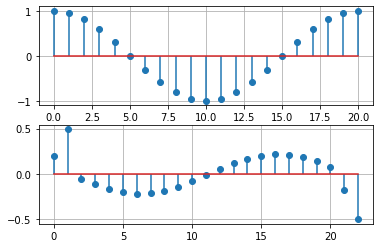

In [11]:
# Since 0.1 pi per sample index, to cover 2 pi (1 cycle) -> 20 sample index
# 0-19 is one sample, 20 - 39 is the next sample, so on.
# Here we choose 101 => the last cycle and 1 more.

# Creates an array of values from 0 to 101, representing the time index of the signals.
n = np.arange(0, 21)

# Creates the input signal x, which is a cosine wave with frequency 0.1π.
x = np.cos(0.1 * np.pi * n)

# Defines the impulse response of the system with the coefficients
h = np.array([0.2, 0.3, -0.5])

# Convolution in Python
y = np.convolve(x, h)

# Plot the results
_, ax = plt.subplots(2, 1)
ax[0].stem(x)
ax[0].grid()
ax[1].stem(y)
ax[1].grid()
plt.show()

## Question 3a

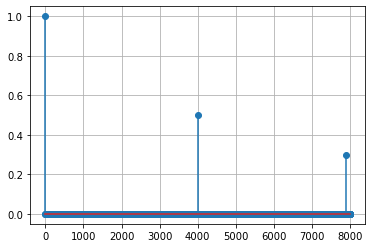

In [14]:
'''
The code defines an impulse response impulseH with 8000 samples, which represents the response of a linear time-invariant (LTI) system to a single impulse input. The impulse response is defined as a series of non-zero values at specific sample indices, with the values at index 1, 4000, and 7900 set to 1, 0.5, and 0.3, respectively.

After plotting the impulse response, the code defines two signals x and h with 9 and 6 samples, respectively. The code then uses a custom function convolve to compute the convolution of x and h, and stores the result in y_test.

Next, the code uses the built-in np.convolve function from NumPy to perform the same convolution and store the result in y. Finally, the code compares the results of the two convolution methods by checking if y and y_test are equal element-wise, and raises an AssertionError if the comparison returns False. This comparison step checks that the custom convolve function correctly implements the convolution operation.
'''

# Assumed finite with this number of sample index
impulseH = np.zeros(8000)
impulseH[1] = 1
impulseH[4000] = 0.5
impulseH[7900] = 0.3

# Plotting the impulse response / that characterise the lti system/ filter.
plt.stem(impulseH)
plt.grid()
plt.show()

# First get the input signal and impulse response
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
h = np.array([1, 2, 3, 4, 5, 6])

# convolve test with our implementation
y_test = convolve(x, h)

# test with numpy function
y = np.convolve(x, h)
comparison = y == y_test
assert comparison.all()

## Question 3b

In [15]:
'''
The code then plays a 16-bit audio file t1_16bit.wav using the play_sound function, reads the sound file into an array sampleX_16bit using the read_sound function, and converts the 16-bit data to floating-point data using the fnNormalize16BitToFloat function, which stores the result in sampleX_float.

The code then performs the convolution of sampleX_float with impulseH using the np.convolve function, and stores the result in y. The time it takes to perform the convolution is recorded and printed.

Next, the code normalizes the floating-point data in y to 16-bit data using the fnNormalizeFloatTo16Bit function, and saves the resulting data to a file t2_16bit.wav using the save_sound function. Finally, the code plays the saved file using the play_sound function.
'''

impulseH = np.zeros(8000)
impulseH[1] = 1
impulseH[4000] = 1
impulseH[7900] = 0.3
    
# Clean file
play_sound('t1_16bit.wav')

# Read in the sound, convert to float
Fs, sampleX_16bit = read_sound('t1_16bit.wav')
sampleX_float = fnNormalize16BitToFloat(sampleX_16bit)
    
print(sampleX_float.shape)

# Filter with our convolution
start = time.time()
y = np.convolve(sampleX_float, impulseH)
print("Time: ",time.time()-start)

# Downsampled and save
y_16bit = fnNormalizeFloatTo16Bit(y)
save_file_name = "t3_16bit.wav"
save_sound(save_file_name, Fs, y_16bit)
play_sound(save_file_name)

(6400,)
Time:  0.007978677749633789


## Question 4a

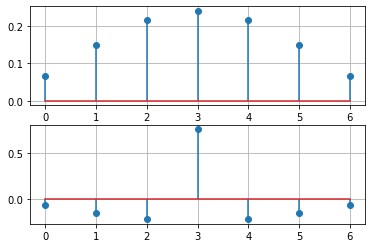

In [21]:
'''
The code defines two arrays, h1 and h2 which are 7-point arrays of floating-point numbers. h1 and h2 are assumed to be impulse responses of two filters.

The code then plots the impulse responses of the two filters on two separate subplots in the same figure.
'''

h1 = np.array([0.06523, 0.14936, 0.21529, 0.2402, 0.21529, 0.14936, 0.06523], dtype='float')
h2 = np.array([-0.06523, -0.14936, -0.21529, 0.7598, -0.21529, -0.14936, -0.06523], dtype='float')
_, ax = plt.subplots(2, 1)
ax[0].stem(h1)
ax[0].grid()
ax[1].stem(h2)
ax[1].grid()
plt.show()

## Question 4b

Results of custom convolution:  [ 0.06523  0.14936  0.21529  0.2402   0.21529  0.14936  0.06523  0.
  0.       0.       0.       0.       0.       0.       0.      -0.13046]
Results of numpy convolution:  [ 0.06523  0.14936  0.21529  0.2402   0.21529  0.14936  0.06523  0.
  0.       0.       0.       0.       0.       0.       0.      -0.13046]
Results of scipy:  [ 0.06523  0.14936  0.21529  0.2402   0.21529  0.14936  0.06523  0.
  0.       0.       0.       0.       0.       0.       0.      -0.13046]
Results of custom convolution:  [-0.06523 -0.14936 -0.21529  0.7598  -0.21529 -0.14936 -0.06523  0.
  0.       0.       0.       0.       0.       0.       0.       0.13046]
Results of numpy convolution:  [-0.06523 -0.14936 -0.21529  0.7598  -0.21529 -0.14936 -0.06523  0.
  0.       0.       0.       0.       0.       0.       0.       0.13046]
Results of signal.lfilter:  [-0.06523 -0.14936 -0.21529  0.7598  -0.21529 -0.14936 -0.06523  0.
  0.       0.       0.       0.       0.       0.

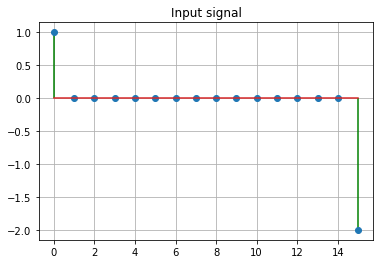

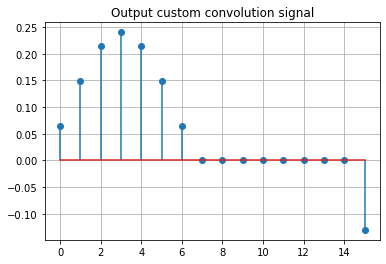

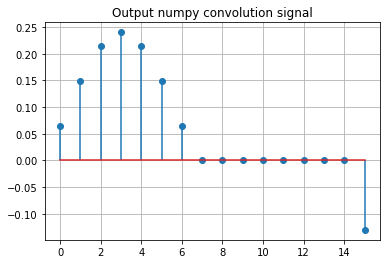

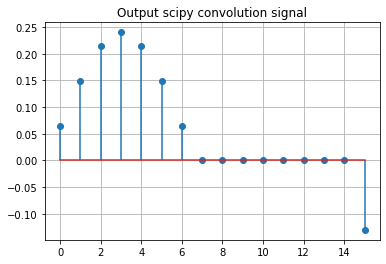

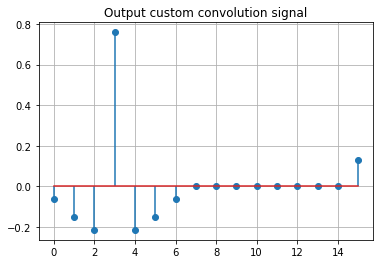

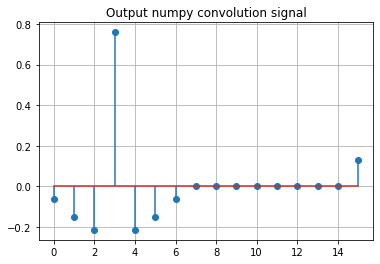

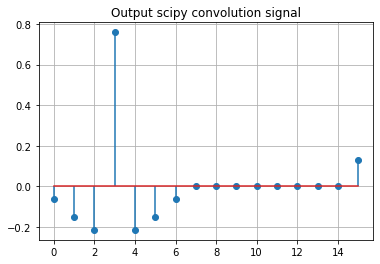

In [13]:
'''
The code is a demonstration of convolution between two signals: h1 and h2 and an input signal x.

h1 and h2 are arrays of filter coefficients that act as filters.

The input signal x is created by taking a range of sample index (0 to 16) and computing delta(n[i]) - 2 * delta(n[i] - 15) for each sample. delta is the Dirac delta function.

x is plotted as a stem plot to check its values.

The convolution between x and h1 is performed using three methods: convolve(), np.convolve(), and signal.lfilter(). The result from each method is stored in results_1_1, results_1_2, and results_1_3, respectively. The first len(n) samples of the result are plotted as a stem plot.

The convolution between x and h2 is performed using the same three methods and the result from each method is stored in results_2_1, results_2_2, and results_2_3, respectively. The first len(n) samples of the result are plotted as a stem plot.

Finally, the plots of the input signal x, results_1_1 and results_2_1 are displayed.
'''

h1 = np.array([0.06523, 0.14936, 0.21529, 0.2402, 0.21529, 0.14936, 0.06523], dtype='float')
h2 = np.array([-0.06523, -0.14936, -0.21529, 0.7598, -0.21529, -0.14936, -0.06523], dtype='float')

# Range of sample index (0 to 16)
# Create the input signal
n = np.arange(0, 16)
x = np.zeros(len(n))
for i in range(len(n)):
    # At n[15]=15, delta(15-15) = delta(0)
    x[i] = delta(n[i]) - 2 * delta(n[i] - 15)

# Sanity check of input signal with a stem plot
plt.figure(1)
plt.grid()
plt.stem(n,x,'g-o',use_line_collection=True)
plt.title("Input signal")

# Result for comparison
results_1_1 = convolve(x, h1)[0:len(n)]
results_1_2 = np.convolve(x, h1)[0:len(n)]
results_1_3 = signal.lfilter(h1, [1], x)
print("Results of custom convolution: ", results_1_1)
print("Results of numpy convolution: ",results_1_2)
print("Results of scipy: ",results_1_3)

plt.figure(2)
plt.grid()
plt.stem(results_1_1,use_line_collection=True)
plt.title("Output custom convolution signal")

plt.figure(3)
plt.grid()
plt.stem(results_1_2,use_line_collection=True)
plt.title("Output numpy convolution signal")

plt.figure(4)
plt.grid()
plt.stem(results_1_3,use_line_collection=True)
plt.title("Output scipy convolution signal")

results_2_1 = convolve(x, h2)[0:len(n)]
results_2_2 = np.convolve(x, h2)[0:len(n)]
results_2_3 = signal.lfilter(h2, [1], x)
print("Results of custom convolution: ", results_2_1)
print("Results of numpy convolution: ",results_2_2)
print("Results of signal.lfilter: ",results_2_3)

plt.figure(5)
plt.grid()
plt.stem(results_2_1,use_line_collection=True)
plt.title("Output custom convolution signal")

plt.figure(6)
plt.grid()
plt.stem(results_2_2,use_line_collection=True)
plt.title("Output numpy convolution signal")

plt.figure(7)
plt.grid()
plt.stem(results_2_3,use_line_collection=True)
plt.title("Output scipy convolution signal")

plt.show()

## Question 4c

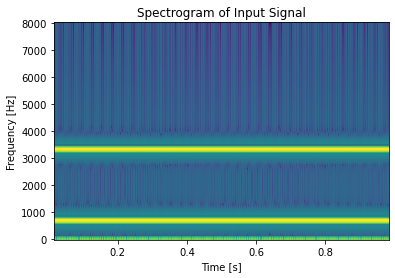

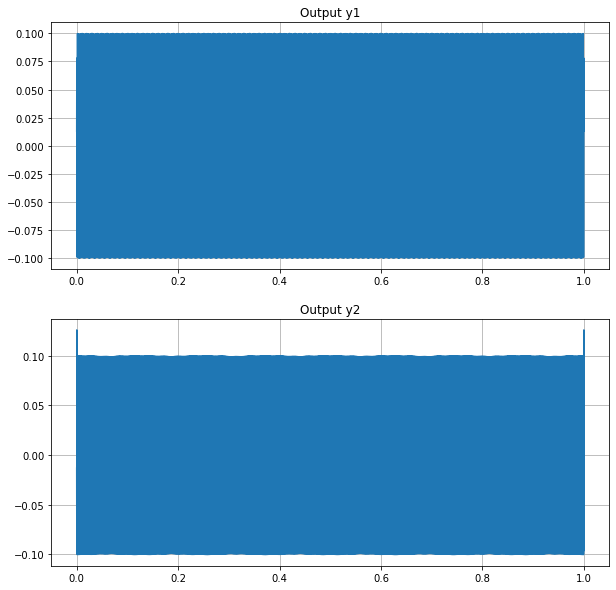

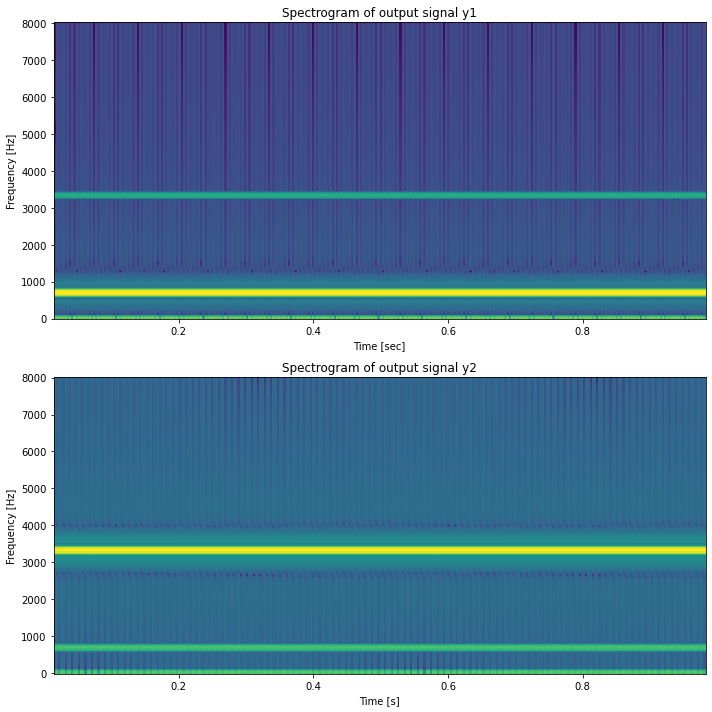

In [21]:
'''
The code generates two sinusoidal signals, with frequencies of 700 Hz and 3333 Hz and superposes them together. It then applies two different systems to the superposed signal, represented by two arrays h1 and h2. These systems are implemented as convolution operations between the input signal and the systems' impulse response, represented by h1 and h2. The outputs of these systems are obtained and their time-domain and frequency-domain representations are plotted and saved as audio files. The time-domain representation of the outputs is plotted in a graph and the frequency-domain representation is plotted in a spectrogram. The audio files are saved in 16-bit format and played back using a sound player.
'''

# Given system characteristics
h1 = np.array([0.06523, 0.14936, 0.21529, 0.2402, 0.21529, 0.14936, 0.06523], dtype='float')
h2 = np.array([-0.06523, -0.14936, -0.21529, 0.7598, -0.21529, -0.14936, -0.06523], dtype='float')

# Generate the signals
# Amplitude, frequency (Hz), sampling frequency, start time, stop time
# Meant to generate for 1 sec but may cut down so easier to verify
_, x1 = fnGenSampledSinusoid(0.1, 700, 0, 16000, 0, 1.0 + 1/16000)
_, x2 = fnGenSampledSinusoid(0.1, 3333, 0, 16000, 0, 1.0 + 1/16000)

# Superpose them together
x = x1 + x2

# Obtain the output through the two systems and from there, get the time
y1 = np.convolve(x, h1)
t1 = np.arange(0, len(y1), 1) * (1 / 16000) #in seconds since period 1 sample = 1/16000 s
y2 = np.convolve(x, h2)
t2 = np.arange(0, len(y2), 1) * (1 / 16000) #in seconds since period 1 sample = 1/16000 s

# Spectrogram of input
[f, t, Sxx] = signal.spectrogram(x, 16000, window=('blackmanharris'),nperseg=512,noverlap=int(0.9*512))
plt.pcolormesh(t, f, 10*np.log10(Sxx), shading='auto')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.title('Spectrogram of Input Signal')
plt.show()

# Plot the output of the system (time domain)
_, ax = plt.subplots(2, 1, figsize = (10,10))
ax[0].plot(t1, y1)
ax[0].grid()
ax[0].set_title("Output y1")
ax[1].plot(t2, y2)
ax[1].grid()
ax[1].set_title("Output y2")
plt.show()

# Spectrogram of generated output (frequency domain)
[f1, t1, Sxx1] = signal.spectrogram(y1, 16000, window=('blackmanharris'),nperseg=512,noverlap=int(0.9*512))
[f2, t2, Sxx2] = signal.spectrogram(y2, 16000, window=('blackmanharris'),nperseg=512,noverlap=int(0.9*512))
_, ax = plt.subplots(2, 1, figsize = (10,10))

ax[0].pcolormesh(t1, f1, 10*np.log10(Sxx1), shading='auto')
ax[0].set_ylabel('Frequency [Hz]')
ax[0].set_xlabel('Time [sec]')
ax[0].set_title('Spectrogram of output signal y1')

ax[1].pcolormesh(t2, f2, 10*np.log10(Sxx2), shading='auto')
ax[1].set_ylabel('Frequency [Hz]')
ax[1].set_xlabel('Time [s]')
ax[1].set_title('Spectrogram of output signal y2')

plt.tight_layout()
plt.show()

# Audio
x_16bit = fnNormalizeFloatTo16Bit(x)
y1_16bit = fnNormalizeFloatTo16Bit(y1)
y2_16bit = fnNormalizeFloatTo16Bit(y2)
x_file_name = 'x_16bit.wav'
y1_file_name = 'y1_16bit.wav'
y2_file_name = 'y2_16bit.wav'
save_sound(x_file_name, 16000, x_16bit)
save_sound(y1_file_name, 16000, y1_16bit)
save_sound(y2_file_name, 16000, y2_16bit)
play_sound(x_file_name)
play_sound(y1_file_name)
play_sound(y2_file_name)

## Question 5a

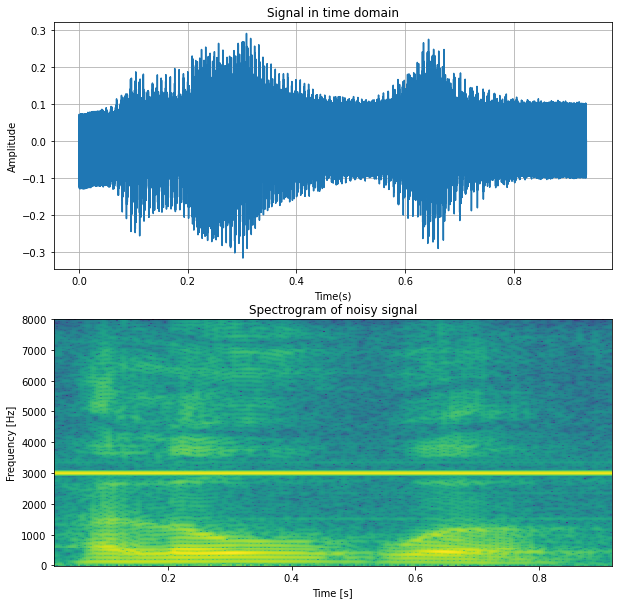

In [23]:
'''
This code is a script for visualizing a noisy audio signal in both time and frequency domains. The audio signal is loaded from a file 'helloworld_noisy_16bit.wav' using the function 'read_sound'. The 16-bit data of the audio signal is normalized to float format using the function 'fnNormalize16BitToFloat'.

The 'spectrogram' function from the 'signal' module is then used to compute the spectral density of the noisy signal, represented as a matrix 'Sxx'. The spectral density shows the distribution of power across different frequencies as a function of time.

The script then creates a subplot with two axes, the first of which plots the audio signal in the time domain, and the second of which shows the spectrogram of the noisy signal. The x-axis of the time-domain plot represents time in seconds, while the y-axis represents the amplitude of the signal. The spectrogram plot shows the distribution of power across different frequencies at different times, with the x-axis representing time in seconds and the y-axis representing frequency in Hertz. The spectrogram plot is shown as a color mesh, with color intensity indicating the power of the signal at a particular frequency and time.
'''

# Load the sound file
ipnoisyfilename = 'helloworld_noisy_16bit.wav'
_, sampleX_16bit = read_sound(ipnoisyfilename)
x = fnNormalize16BitToFloat(sampleX_16bit)
    
[f, t, Sxx] = signal.spectrogram(x, 16000, window=('blackmanharris'),nperseg=512,noverlap=int(0.9*512))
_, ax = plt.subplots(2, 1, figsize = (10,10))
t1 = np.arange(0, len(x), 1) * (1 / 16000)

ax[0].plot(t1, x)
ax[0].grid()
ax[0].set_title('Signal in time domain')
ax[0].set_xlabel('Time(s)')
ax[0].set_ylabel('Amplitude')
ax[1].pcolormesh(t, f, 10*np.log10(Sxx), shading='auto')
ax[1].set_ylabel('Frequency [Hz]')
ax[1].set_xlabel('Time [s]')
ax[1].set_title('Spectrogram of noisy signal')

plt.show()

## Question 5b

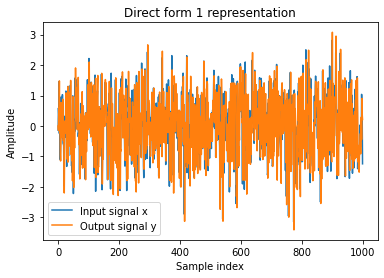

In [26]:
# Coefficients
B = [1, -0.7653668, 0.99999]
A = [1, -0.722744, 0.888622]

# Number of samples
N = 1000

# Input signal (white noise)
x = np.random.normal(size=N)

# Initialize arrays for storing intermediate values
v = np.zeros(N)
w = np.zeros(N)

# Calculate the output signal
for n in range(N-1):
    v[n+1] = x[n] - A[1] * v[n] - A[2] * v[n-1]
    w[n+1] = B[0] * v[n+1] + B[1] * v[n] + B[2] * v[n-1]

# Plot the input and output signals
plt.figure()
plt.plot(x, label='Input signal x')
plt.plot(w, label='Output signal y')
plt.legend()
plt.xlabel('Sample index')
plt.ylabel('Amplitude')
plt.title('Direct form 1 representation')
plt.show()

## Question 5c

In [28]:
'''
This code is an implementation of an Infinite Impulse Response (IIR) filter on an audio signal, stored in the file 'helloworld_noisy_16bit.wav'. The filter is applied to the audio signal, which is first read and converted to a floating-point number representation using the function read_sound() and fnNormalize16BitToFloat(), respectively.

The filter coefficients B and A define the transfer function of the filter. The filter is applied to the audio signal x by implementing the difference equation in a for-loop that calculates the output signal y. The result of the filter implementation is compared to the result of the same filter implementation using the signal.lfilter function from the scipy.signal library. If the result from both implementations is equal, it prints "Very Good!", otherwise, it prints "WARN" and the values that do not match.
'''

ipnoisyfilename = 'helloworld_noisy_16bit.wav'
_, sampleX_16bit = read_sound(ipnoisyfilename)
# Convert to float
x = fnNormalize16BitToFloat(sampleX_16bit)
    
# Output should be same size as input
y = np.zeros(len(x), dtype=float)

# Filter coeff
B = [1, -0.7653668, 0.99999]
A = [1, -0.722744, 0.888622]

# Loop through input x axis space (and not the output one just in case)
# Assume system is causal
for n in range(len(x)):
    if n == 0:
        # Only input, only output, the rest of the term are all 0 
        y[n] = 1 * x[n]
    elif n == 1:
        # Only input at n=1, output at n=0 (in delayed term), input at n=0(in delayed term)
        y[n] = 1 * x[n] + (-0.7653668) * x[n - 1] - (-0.722744) * y[n - 1]
    else:
        # Should have all the necessary input, input delayed once and delayed twice
        # Should calculate based on delayed output once and twice
        y[n] = 1 * x[n] + (-0.7653668) * x[n - 1] + 0.99999 * x[n - 2] - (-0.722744) * y[n - 1] - 0.888622 * y[n - 2]
    
# For comparison
y_ifil = signal.lfilter(B, A, x)
print("Length of SCIPY filtered output: " ,len(y_ifil))
print("Length of output: ", len(y))

# Check
for i in range(len(y)):
    if y[i] == y_ifil[i]:
        print("Value: ", y[i])
        print("==============================RIGHT===================================")
        print(' ')
        continue
    else:
        print("========WRONG========")
        print("Custom Convolution Answer: ",y[i])
        print("Scipy Answer: ",y_ifil[i])
        print("=====================")
        print(' ')

Length of SCIPY filtered output:  14933
Length of output:  14933
Value:  0.07126071962645344
==============================RIGHT===================================
 
========WRONG========
Custom Convolution Answer:  0.006911702688680688
Scipy Answer:  0.006911702688680686
 
========WRONG========
Custom Convolution Answer:  -0.09215922417887118
Scipy Answer:  -0.0921592241788712
 
========WRONG========
Custom Convolution Answer:  -0.10743131383114853
Scipy Answer:  -0.10743131383114854
 
========WRONG========
Custom Convolution Answer:  -0.029433291071460463
Scipy Answer:  -0.029433291071460466
 
========WRONG========
Custom Convolution Answer:  0.04013044573567381
Scipy Answer:  0.04013044573567382
 
========WRONG========
Custom Convolution Answer:  0.020832133125709605
Scipy Answer:  0.02083213312570962
 
========WRONG========
Custom Convolution Answer:  -0.05467196411668359
Scipy Answer:  -0.0546719641166836
 
========WRONG========
Custom Convolution Answer:  -0.09249903492134295
Sci

Scipy Answer:  -0.02440059651949587
 
========WRONG========
Custom Convolution Answer:  -0.025014931419164225
Scipy Answer:  -0.02501493141916422
 
========WRONG========
Custom Convolution Answer:  -0.02578071803337358
Scipy Answer:  -0.025780718033373604
 
========WRONG========
Custom Convolution Answer:  -0.025020369571099082
Scipy Answer:  -0.025020369571099096
 
========WRONG========
Custom Convolution Answer:  -0.02488808281515332
Scipy Answer:  -0.024888082815153312
 
========WRONG========
Custom Convolution Answer:  -0.02355685200888216
Scipy Answer:  -0.02355685200888215
 
========WRONG========
Custom Convolution Answer:  -0.022531084554419153
Scipy Answer:  -0.022531084554419142
 
========WRONG========
Custom Convolution Answer:  -0.023100059738105794
Scipy Answer:  -0.02310005973810579
 
========WRONG========
Custom Convolution Answer:  -0.023340707764826957
Scipy Answer:  -0.023340707764826968
 
========WRONG========
Custom Convolution Answer:  -0.02273567342651648
Scipy Ans

Scipy Answer:  -0.020085572322401768
 
========WRONG========
Custom Convolution Answer:  -0.016406893675349546
Scipy Answer:  -0.016406893675349532
 
========WRONG========
Custom Convolution Answer:  -0.015279344001081299
Scipy Answer:  -0.015279344001081302
 
========WRONG========
Custom Convolution Answer:  -0.013810818254566001
Scipy Answer:  -0.013810818254566022
 
========WRONG========
Custom Convolution Answer:  -0.00931282511798983
Scipy Answer:  -0.009312825117989837
 
========WRONG========
Custom Convolution Answer:  -0.00826279774553232
Scipy Answer:  -0.008262797745532305
 
========WRONG========
Custom Convolution Answer:  -0.0072210453823055715
Scipy Answer:  -0.007221045382305551
 
========WRONG========
Custom Convolution Answer:  -0.005840447007637548
Scipy Answer:  -0.005840447007637556
 
========WRONG========
Custom Convolution Answer:  -0.0044376083803165135
Scipy Answer:  -0.004437608380316538
 
========WRONG========
Custom Convolution Answer:  -0.005124584356453174
S

 
========WRONG========
Custom Convolution Answer:  -6.871540652825058e-05
Scipy Answer:  -6.871540652826635e-05
 
========WRONG========
Custom Convolution Answer:  -0.0010272269849325659
Scipy Answer:  -0.0010272269849325583
 
========WRONG========
Custom Convolution Answer:  -0.007557680550160247
Scipy Answer:  -0.007557680550160234
 
========WRONG========
Custom Convolution Answer:  -0.0052364706891124355
Scipy Answer:  -0.005236470689112438
 
========WRONG========
Custom Convolution Answer:  -0.0060012568024058344
Scipy Answer:  -0.006001256802405847
 
========WRONG========
Custom Convolution Answer:  0.000659992222799795
Scipy Answer:  0.0006599922227997906
 
========WRONG========
Custom Convolution Answer:  0.011583188339673318
Scipy Answer:  0.01158318833967334
 
========WRONG========
Custom Convolution Answer:  0.01707089623078969
Scipy Answer:  0.01707089623078971
 
========WRONG========
Custom Convolution Answer:  0.02005045494099146
Scipy Answer:  0.020050454940991457
 
====

Custom Convolution Answer:  0.08074424173145325
Scipy Answer:  0.08074424173145324
 
Value:  0.05962630822126316
==============================RIGHT===================================
 
========WRONG========
Custom Convolution Answer:  0.024107578138357108
Scipy Answer:  0.024107578138357122
 
========WRONG========
Custom Convolution Answer:  0.009343142039438243
Scipy Answer:  0.009343142039438257
 
========WRONG========
Custom Convolution Answer:  -0.012846901631621893
Scipy Answer:  -0.012846901631621888
 
========WRONG========
Custom Convolution Answer:  -0.03282291728954064
Scipy Answer:  -0.03282291728954065
 
========WRONG========
Custom Convolution Answer:  -0.0540949108027252
Scipy Answer:  -0.054094910802725195
 
Value:  -0.0584315306201387
==============================RIGHT===================================
 
========WRONG========
Custom Convolution Answer:  -0.06376166138138935
Scipy Answer:  -0.06376166138138936
 
Value:  -0.07603853151931916
============================

Scipy Answer:  0.04065238472965412
 
========WRONG========
Custom Convolution Answer:  0.029549301159385567
Scipy Answer:  0.029549301159385546
 
========WRONG========
Custom Convolution Answer:  0.011327624949771423
Scipy Answer:  0.011327624949771437
 
========WRONG========
Custom Convolution Answer:  -0.00020339693781397383
Scipy Answer:  -0.00020339693781393914
 
========WRONG========
Custom Convolution Answer:  -0.004661044755616496
Scipy Answer:  -0.004661044755616489
 
========WRONG========
Custom Convolution Answer:  -0.01839193696487165
Scipy Answer:  -0.018391936964871666
 
========WRONG========
Custom Convolution Answer:  -0.029008953242040253
Scipy Answer:  -0.02900895324204027
 
Value:  -0.0354262946841514
==============================RIGHT===================================
 
Value:  -0.04011101997428081
==============================RIGHT===================================
 
========WRONG========
Custom Convolution Answer:  -0.039938004730837404
Scipy Answer:  -0.039938

 
========WRONG========
Custom Convolution Answer:  0.06500064006010796
Scipy Answer:  0.06500064006010788
 
========WRONG========
Custom Convolution Answer:  0.052270588467435694
Scipy Answer:  0.052270588467435646
 
========WRONG========
Custom Convolution Answer:  0.03730911115271709
Scipy Answer:  0.03730911115271714
 
========WRONG========
Custom Convolution Answer:  0.05539317795754258
Scipy Answer:  0.05539317795754267
 
========WRONG========
Custom Convolution Answer:  0.06725004558878733
Scipy Answer:  0.06725004558878736
 
========WRONG========
Custom Convolution Answer:  0.05435940199541835
Scipy Answer:  0.05435940199541829
 
========WRONG========
Custom Convolution Answer:  0.0778206285974463
Scipy Answer:  0.07782062859744623
 
========WRONG========
Custom Convolution Answer:  0.09629881983245624
Scipy Answer:  0.09629881983245625
 
========WRONG========
Custom Convolution Answer:  0.10602145722293976
Scipy Answer:  0.10602145722293982
 
========WRONG========
Custom Convo

Custom Convolution Answer:  0.01049465944745143
Scipy Answer:  0.01049465944745144
 
Value:  0.014162094965820993
==============================RIGHT===================================
 
========WRONG========
Custom Convolution Answer:  0.01723957040117926
Scipy Answer:  0.017239570401179252
 
========WRONG========
Custom Convolution Answer:  0.024046415782328738
Scipy Answer:  0.02404641578232873
 
Value:  0.03331570164105472
==============================RIGHT===================================
 
========WRONG========
Custom Convolution Answer:  0.048178236005275224
Scipy Answer:  0.04817823600527523
 
========WRONG========
Custom Convolution Answer:  0.06349496484422323
Scipy Answer:  0.06349496484422325
 
========WRONG========
Custom Convolution Answer:  0.07778068059544437
Scipy Answer:  0.07778068059544438
 
Value:  0.10023558596638504
==============================RIGHT===================================
 
Value:  0.11701319666675893
==============================RIGHT==========

Scipy Answer:  -0.08749197623536353
 
========WRONG========
Custom Convolution Answer:  -0.0849337149304716
Scipy Answer:  -0.08493371493047165
 
========WRONG========
Custom Convolution Answer:  -0.07038362191695896
Scipy Answer:  -0.07038362191695899
 
========WRONG========
Custom Convolution Answer:  -0.06384309595809448
Scipy Answer:  -0.06384309595809445
 
========WRONG========
Custom Convolution Answer:  -0.05336128718675402
Scipy Answer:  -0.05336128718675399
 
========WRONG========
Custom Convolution Answer:  -0.05565015805406285
Scipy Answer:  -0.05565015805406284
 
========WRONG========
Custom Convolution Answer:  -0.0466468170544207
Scipy Answer:  -0.046646817054420725
 
========WRONG========
Custom Convolution Answer:  -0.03939955114360391
Scipy Answer:  -0.03939955114360395
 
========WRONG========
Custom Convolution Answer:  -0.035436005135909436
Scipy Answer:  -0.03543600513590943
 
========WRONG========
Custom Convolution Answer:  -0.019222708667688278
Scipy Answer:  -0.

========WRONG========
Custom Convolution Answer:  -0.0075219481683055055
Scipy Answer:  -0.007521948168305537
 
========WRONG========
Custom Convolution Answer:  0.000492911618298307
Scipy Answer:  0.0004929116182982723
 
========WRONG========
Custom Convolution Answer:  -0.002010372804072246
Scipy Answer:  -0.002010372804072229
 
========WRONG========
Custom Convolution Answer:  0.0035221499200190597
Scipy Answer:  0.003522149920019091
 
========WRONG========
Custom Convolution Answer:  0.000540007937491957
Scipy Answer:  0.0005400079374919681
 
========WRONG========
Custom Convolution Answer:  0.005314322680119351
Scipy Answer:  0.005314322680119318
 
========WRONG========
Custom Convolution Answer:  0.01018704535024917
Scipy Answer:  0.010187045350249127
 
========WRONG========
Custom Convolution Answer:  0.010537226203634353
Scipy Answer:  0.010537226203634346
 
========WRONG========
Custom Convolution Answer:  0.01499584452660591
Scipy Answer:  0.014995844526605934
 
========WRONG

========WRONG========
Custom Convolution Answer:  0.02235769813873204
Scipy Answer:  0.022357698138732063
 
========WRONG========
Custom Convolution Answer:  0.022964582565316694
Scipy Answer:  0.02296458256531672
 
Value:  0.020838596796395353
==============================RIGHT===================================
 
========WRONG========
Custom Convolution Answer:  0.022077981455207063
Scipy Answer:  0.022077981455207035
 
========WRONG========
Custom Convolution Answer:  0.017768579854992993
Scipy Answer:  0.017768579854992972
 
========WRONG========
Custom Convolution Answer:  0.016396315146395248
Scipy Answer:  0.016396315146395245
 
========WRONG========
Custom Convolution Answer:  0.015961758720552686
Scipy Answer:  0.015961758720552707
 
========WRONG========
Custom Convolution Answer:  0.014584932614442313
Scipy Answer:  0.014584932614442332
 
========WRONG========
Custom Convolution Answer:  0.014551882654182701
Scipy Answer:  0.01455188265418269
 
========WRONG========
Custom 

 
========WRONG========
Custom Convolution Answer:  -0.006691833421906794
Scipy Answer:  -0.0066918334219067815
 
========WRONG========
Custom Convolution Answer:  -0.005041488286021741
Scipy Answer:  -0.005041488286021759
 
========WRONG========
Custom Convolution Answer:  -0.0027628352829759386
Scipy Answer:  -0.0027628352829759673
 
========WRONG========
Custom Convolution Answer:  3.911760839751116e-05
Scipy Answer:  3.911760839750422e-05
 
========WRONG========
Custom Convolution Answer:  0.003470469783153315
Scipy Answer:  0.0034704697831533377
 
========WRONG========
Custom Convolution Answer:  0.005019592782348213
Scipy Answer:  0.005019592782348231
 
========WRONG========
Custom Convolution Answer:  0.008264002238697252
Scipy Answer:  0.008264002238697249
 
========WRONG========
Custom Convolution Answer:  0.010593695508877916
Scipy Answer:  0.010593695508877898
 
========WRONG========
Custom Convolution Answer:  0.011661734086822924
Scipy Answer:  0.011661734086822917
 
=====

Scipy Answer:  0.00589394216070191
 
Value:  0.005359762169543328
==============================RIGHT===================================
 
========WRONG========
Custom Convolution Answer:  0.005894637461970282
Scipy Answer:  0.00589463746197029
 
========WRONG========
Custom Convolution Answer:  0.0044262791981331704
Scipy Answer:  0.004426279198133168
 
========WRONG========
Custom Convolution Answer:  0.002589253238758367
Scipy Answer:  0.00258925323875836
 
========WRONG========
Custom Convolution Answer:  0.002463870545666013
Scipy Answer:  0.0024638705456660123
 
========WRONG========
Custom Convolution Answer:  0.0024738457395869842
Scipy Answer:  0.002473845739586991
 
========WRONG========
Custom Convolution Answer:  0.0017821214363771274
Scipy Answer:  0.0017821214363771404
 
========WRONG========
Custom Convolution Answer:  0.0009729349188671364
Scipy Answer:  0.0009729349188671299
 
========WRONG========
Custom Convolution Answer:  0.0009599490218325148
Scipy Answer:  0.0009

Custom Convolution Answer:  0.007383495687321463
Scipy Answer:  0.007383495687321481
 
========WRONG========
Custom Convolution Answer:  0.006696253570139061
Scipy Answer:  0.00669625357013906
 
========WRONG========
Custom Convolution Answer:  0.006231387127786733
Scipy Answer:  0.006231387127786717
 
========WRONG========
Custom Convolution Answer:  0.005638291822834349
Scipy Answer:  0.005638291822834332
 
========WRONG========
Custom Convolution Answer:  0.006169823987236678
Scipy Answer:  0.006169823987236683
 
========WRONG========
Custom Convolution Answer:  0.006118632507984564
Scipy Answer:  0.006118632507984584
 
========WRONG========
Custom Convolution Answer:  0.005838202403397506
Scipy Answer:  0.005838202403397524
 
========WRONG========
Custom Convolution Answer:  0.006423527107507826
Scipy Answer:  0.00642352710750782
 
========WRONG========
Custom Convolution Answer:  0.006740389698912559
Scipy Answer:  0.0067403896989125245
 
========WRONG========
Custom Convolution A

 
========WRONG========
Custom Convolution Answer:  0.07865048829932024
Scipy Answer:  0.07865048829932023
 
========WRONG========
Custom Convolution Answer:  0.08547698609846704
Scipy Answer:  0.08547698609846702
 
========WRONG========
Custom Convolution Answer:  0.0749273559239634
Scipy Answer:  0.07492735592396338
 
Value:  0.07230213786509593
==============================RIGHT===================================
 
========WRONG========
Custom Convolution Answer:  0.06330957241634876
Scipy Answer:  0.0633095724163488
 
========WRONG========
Custom Convolution Answer:  0.05158194501649413
Scipy Answer:  0.05158194501649416
 
========WRONG========
Custom Convolution Answer:  0.03924853347464153
Scipy Answer:  0.03924853347464152
 
========WRONG========
Custom Convolution Answer:  0.019672655534730132
Scipy Answer:  0.01967265553473011
 
========WRONG========
Custom Convolution Answer:  0.0056989162306285215
Scipy Answer:  0.005698916230628515
 
========WRONG========
Custom Convolutio

========WRONG========
Custom Convolution Answer:  0.04163445763182503
Scipy Answer:  0.04163445763182501
 
========WRONG========
Custom Convolution Answer:  0.038468382093761036
Scipy Answer:  0.03846838209376104
 
========WRONG========
Custom Convolution Answer:  0.0334059520152272
Scipy Answer:  0.03340595201522722
 
Value:  0.03348591403813028
==============================RIGHT===================================
 
========WRONG========
Custom Convolution Answer:  0.041130594521020705
Scipy Answer:  0.04113059452102069
 
Value:  0.05128604730499013
==============================RIGHT===================================
 
========WRONG========
Custom Convolution Answer:  0.05354999818059375
Scipy Answer:  0.05354999818059378
 
========WRONG========
Custom Convolution Answer:  0.05930379959696688
Scipy Answer:  0.05930379959696691
 
========WRONG========
Custom Convolution Answer:  0.06951237084644889
Scipy Answer:  0.06951237084644887
 
========WRONG========
Custom Convolution Answer:

 
========WRONG========
Custom Convolution Answer:  -0.1050164357000197
Scipy Answer:  -0.10501643570001969
 
========WRONG========
Custom Convolution Answer:  -0.12231542251045112
Scipy Answer:  -0.12231542251045108
 
========WRONG========
Custom Convolution Answer:  -0.1320475551929869
Scipy Answer:  -0.13204755519298683
 
========WRONG========
Custom Convolution Answer:  -0.1365186388052259
Scipy Answer:  -0.13651863880522586
 
Value:  -0.1330890578103882
==============================RIGHT===================================
 
========WRONG========
Custom Convolution Answer:  -0.12462229776480173
Scipy Answer:  -0.12462229776480178
 
========WRONG========
Custom Convolution Answer:  -0.10999650026600861
Scipy Answer:  -0.10999650026600867
 
========WRONG========
Custom Convolution Answer:  -0.07995438481306111
Scipy Answer:  -0.0799543848130611
 
========WRONG========
Custom Convolution Answer:  -0.04831655061812512
Scipy Answer:  -0.048316550618125065
 
========WRONG========
Custom

Scipy Answer:  -0.0024854755011655127
 
========WRONG========
Custom Convolution Answer:  -0.007593070124314179
Scipy Answer:  -0.007593070124314177
 
========WRONG========
Custom Convolution Answer:  -0.01357719497750181
Scipy Answer:  -0.013577194977501794
 
========WRONG========
Custom Convolution Answer:  -0.015069241429574387
Scipy Answer:  -0.015069241429574373
 
========WRONG========
Custom Convolution Answer:  -0.015066988761195999
Scipy Answer:  -0.015066988761196012
 
========WRONG========
Custom Convolution Answer:  -0.014092421153603962
Scipy Answer:  -0.014092421153603988
 
========WRONG========
Custom Convolution Answer:  -0.01290801302259022
Scipy Answer:  -0.012908013022590217
 
========WRONG========
Custom Convolution Answer:  -0.013060846916902298
Scipy Answer:  -0.013060846916902267
 
========WRONG========
Custom Convolution Answer:  -0.011081298524188238
Scipy Answer:  -0.011081298524188224
 
========WRONG========
Custom Convolution Answer:  -0.00677596793475011
Sci

 
========WRONG========
Custom Convolution Answer:  0.012512909558468833
Scipy Answer:  0.01251290955846883
 
Value:  0.00963392781436867
==============================RIGHT===================================
 
========WRONG========
Custom Convolution Answer:  0.009605766274054387
Scipy Answer:  0.009605766274054385
 
========WRONG========
Custom Convolution Answer:  0.00838442939957015
Scipy Answer:  0.008384429399570154
 
Value:  0.006056793763360033
==============================RIGHT===================================
 
========WRONG========
Custom Convolution Answer:  0.009637584449012465
Scipy Answer:  0.00963758444901247
 
========WRONG========
Custom Convolution Answer:  0.012200808561446648
Scipy Answer:  0.012200808561446647
 
========WRONG========
Custom Convolution Answer:  0.01288281307835156
Scipy Answer:  0.012882813078351549
 
========WRONG========
Custom Convolution Answer:  0.015234031589250959
Scipy Answer:  0.015234031589250949
 
========WRONG========
Custom Convolu

========WRONG========
Custom Convolution Answer:  0.007930259148325253
Scipy Answer:  0.00793025914832525
 
========WRONG========
Custom Convolution Answer:  0.006652040600636925
Scipy Answer:  0.006652040600636941
 
========WRONG========
Custom Convolution Answer:  0.0038811476419183186
Scipy Answer:  0.0038811476419183533
 
========WRONG========
Custom Convolution Answer:  0.0033435531486242943
Scipy Answer:  0.0033435531486242995
 
========WRONG========
Custom Convolution Answer:  0.001787198711144009
Scipy Answer:  0.0017871987111439808
 
========WRONG========
Custom Convolution Answer:  -0.0008345779186726774
Scipy Answer:  -0.0008345779186727104
 
========WRONG========
Custom Convolution Answer:  -0.002324350485704351
Scipy Answer:  -0.002324350485704342
 
========WRONG========
Custom Convolution Answer:  -0.0035371878169037476
Scipy Answer:  -0.0035371878169037224
 
========WRONG========
Custom Convolution Answer:  -0.0028637506590509826
Scipy Answer:  -0.002863750659050965
 
==

Custom Convolution Answer:  -0.000606187482806357
Scipy Answer:  -0.0006061874828063585
 
========WRONG========
Custom Convolution Answer:  -0.0003866882455251595
Scipy Answer:  -0.00038668824552517966
 
========WRONG========
Custom Convolution Answer:  -0.0001448209944320205
Scipy Answer:  -0.00014482099443204055
 
========WRONG========
Custom Convolution Answer:  0.0007961535455516052
Scipy Answer:  0.0007961535455516075
 
========WRONG========
Custom Convolution Answer:  0.0013847874685570143
Scipy Answer:  0.0013847874685570388
 
========WRONG========
Custom Convolution Answer:  0.0018363296244826165
Scipy Answer:  0.00183632962448263
 
========WRONG========
Custom Convolution Answer:  0.001318909119265432
Scipy Answer:  0.001318909119265424
 
========WRONG========
Custom Convolution Answer:  0.0014402605349926269
Scipy Answer:  0.0014402605349926184
 
========WRONG========
Custom Convolution Answer:  0.002147979107018794
Scipy Answer:  0.002147979107018798
 
========WRONG========


Custom Convolution Answer:  0.0030742856414113307
Scipy Answer:  0.0030742856414113368
 
========WRONG========
Custom Convolution Answer:  0.003775399152333504
Scipy Answer:  0.0037753991523334887
 
========WRONG========
Custom Convolution Answer:  0.0030505525116724212
Scipy Answer:  0.003050552511672397
 
========WRONG========
Custom Convolution Answer:  0.0031131993157413394
Scipy Answer:  0.003113199315741333
 
========WRONG========
Custom Convolution Answer:  0.0037337112032648895
Scipy Answer:  0.0037337112032649125
 
========WRONG========
Custom Convolution Answer:  0.003971429308645146
Scipy Answer:  0.0039714293086451635
 
========WRONG========
Custom Convolution Answer:  0.003246287885863004
Scipy Answer:  0.0032462878858629945
 
========WRONG========
Custom Convolution Answer:  0.0036105919189084847
Scipy Answer:  0.0036105919189084873
 
========WRONG========
Custom Convolution Answer:  0.00436447856321927
Scipy Answer:  0.004364478563219282
 
========WRONG========
Custom Co

Custom Convolution Answer:  0.0013204861668359746
Scipy Answer:  0.0013204861668359852
 
========WRONG========
Custom Convolution Answer:  0.001547621005336068
Scipy Answer:  0.00154762100533605
 
========WRONG========
Custom Convolution Answer:  0.0017517105990856475
Scipy Answer:  0.0017517105990856319
 
========WRONG========
Custom Convolution Answer:  0.002172179493409581
Scipy Answer:  0.002172179493409588
 


## Question 5d

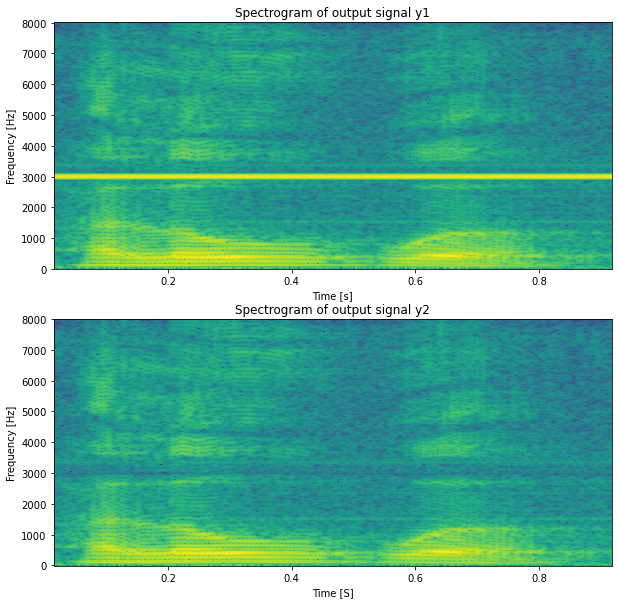

In [29]:
'''
This code does the following:

Loads an audio file 'helloworld_noisy_16bit.wav' using the 'read_sound' function. The loaded audio data is stored in the 'sampleX_16bit' variable.
Converts the audio data from 16-bit format to floating-point format using the 'fnNormalize16BitToFloat' function and stores it in the 'x' variable.
Defines filter coefficients 'B' and 'A' for a 2nd order digital filter.
Applies the filter to the audio data 'x' using the 'signal.lfilter' function, and stores the filtered audio in the 'y_ifil' variable.
Converts the filtered audio data from floating-point format to 16-bit format using the 'fnNormalizeFloatTo16Bit' function, and stores it in 'y_ifil_16bit'.
Saves the filtered audio data in a new file 'y_ifil.wav' using the 'save_sound' function.
Plays the filtered audio using the 'play_sound' function.
Plots the spectrogram of the original audio 'x' and filtered audio 'y_ifil' in two subplots. The spectrogram is calculated using the 'signal.spectrogram' function with a 'blackmanharris' window, 'nperseg' of 512, and 90% overlap. The logarithmically scaled spectrogram is displayed as a color plot with time on the x-axis and frequency on the y-axis.
'''

ipnoisyfilename = 'helloworld_noisy_16bit.wav'
_, sampleX_16bit = read_sound(ipnoisyfilename)
# To float
x = fnNormalize16BitToFloat(sampleX_16bit)
# Coefficient for filter
B = [1, -0.7653668, 0.99999]
A = [1, -0.722744, 0.888622]

# Filtering
y_ifil = signal.lfilter(B, A, x)
y_ifil_16bit = fnNormalizeFloatTo16Bit(y_ifil)
y_ifil_name = 'y_ifil.wav'
save_sound(y_ifil_name, 16000, y_ifil_16bit)
play_sound(y_ifil_name)

# Plotting Spectrogram
[f1, t1, Sxx1] = signal.spectrogram(x, 16000, window=('blackmanharris'),nperseg=512,noverlap=int(0.9*512))
[f2, t2, Sxx2] = signal.spectrogram(y_ifil, 16000, window=('blackmanharris'),nperseg=512,noverlap=int(0.9*512))
_, ax = plt.subplots(2, 1, figsize = (10,10))

ax[0].pcolormesh(t1, f1, 10*np.log10(Sxx1), shading='auto')
ax[0].set_ylabel('Frequency [Hz]')
ax[0].set_xlabel('Time [s]')
ax[0].set_title('Spectrogram of output signal y1')

ax[1].pcolormesh(t2, f2, 10*np.log10(Sxx2), shading='auto')
ax[1].set_ylabel('Frequency [Hz]')
ax[1].set_xlabel('Time [S]')
ax[1].set_title('Spectrogram of output signal y2')
plt.show()

## Question 5f

In [30]:
x = np.zeros(10, dtype=float)
x[0] = 1
B = [1, -0.7653668, 0.99999]
A = [1, -0.722744, 0.888622]
y_ifil = signal.lfilter(B, A, x)
print(y_ifil)

[ 1.         -0.0426228   0.08056263  0.09610171 -0.00213279 -0.08693955
 -0.0609398   0.03321253  0.0781566   0.02697383]
